In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
all_star = pd.read_excel("NBAallStar.xlsx")
rank = pd.read_csv("ranking.csv")
details = pd.read_csv("games_details.csv")
games = pd.read_csv("games.csv")
teams = pd.read_csv("teams.csv")

/var/folders/nk/kc41xjcj09n731lz40b9xg6c0000gn/T/ipykernel_29171/3585499092.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  details = pd.read_csv("games_details.csv")


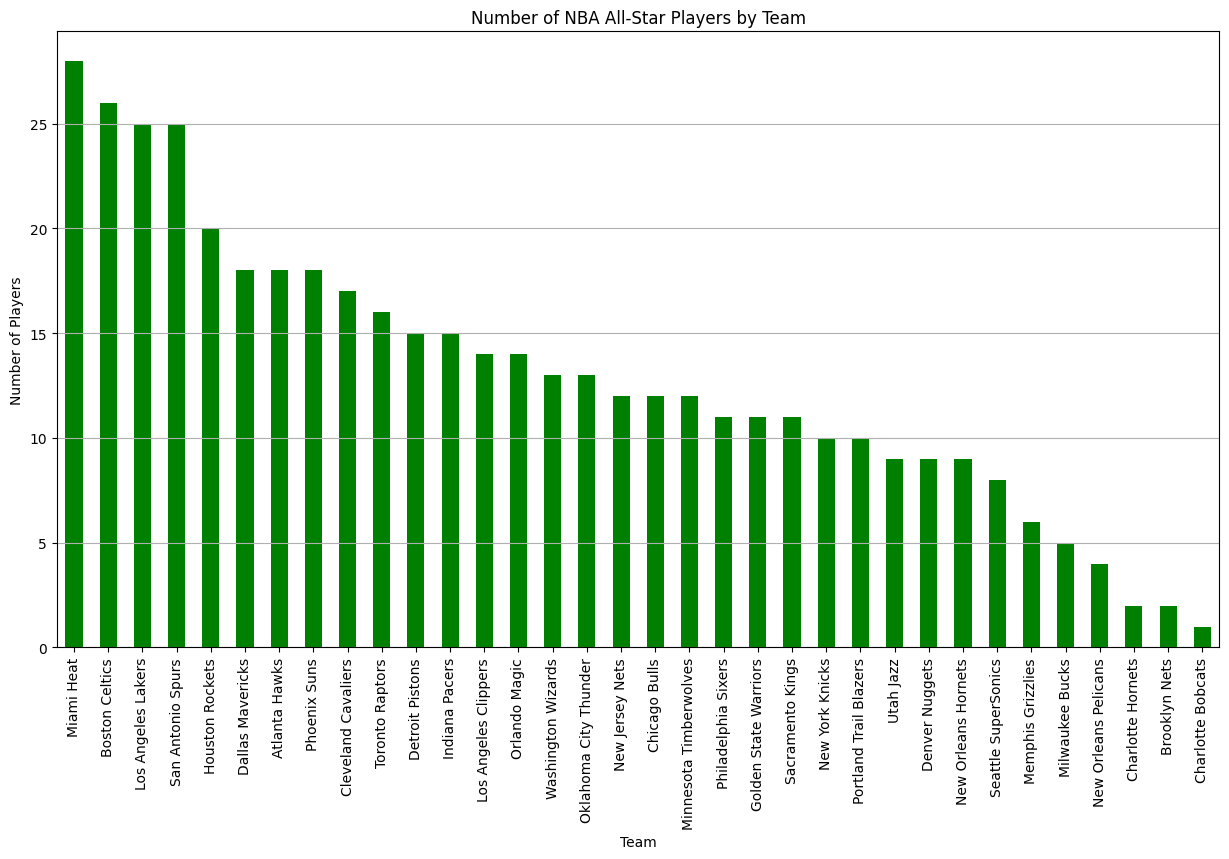

In [4]:
team_counts = all_star['Team'].value_counts()

team_counts_sorted = team_counts.sort_values(ascending=False)

plt.figure(figsize=(15, 8))
team_counts_sorted.plot(kind='bar', color='green')
plt.title('Number of NBA All-Star Players by Team')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [5]:
def find_winrate(df,team_id, season_id):
    a = df[df['TEAM_ID']== team_id]
    num = np.argmax(a[a['SEASON_ID']==season_id]['G'])
    winrate = a[a['SEASON_ID']==season_id]['W_PCT'].iloc[num]
    
    return winrate

In [6]:
eastern_conference_players = [
    "Kyrie Irving",
    "DeMar DeRozan",
    "LeBron James",
    "Jimmy Butler",
    "Giannis Antetokounmpo",
    "Isaiah Thomas",
    "John Wall",
    "Kevin Love",
    "Carmelo Anthony",
    "Kyle Lowry",
    "Paul George",
    "Kemba Walker",
    "Paul Millsap"
]

western_conference_players = [
    "Stephen Curry",
    "James Harden",
    "Kevin Durant",
    "Kawhi Leonard",
    "Anthony Davis",
    "Russell Westbrook",
    "Klay Thompson",
    "Draymond Green",
    "DeMarcus Cousins",
    "Marc Gasol",
    "DeAndre Jordan",
    "Gordon Hayward"
]

all_star_players_2017 = eastern_conference_players + western_conference_players

eastern_conference_players_2018 = [
    "Kyrie Irving",
    "DeMar DeRozan",
    "LeBron James",
    "Giannis Antetokounmpo",
    "Joel Embiid",
    "Bradley Beal",
    "Goran Dragić",
    "Al Horford",
    "Kevin Love",
    "Kyle Lowry",
    "Victor Oladipo",
    "Kristaps Porziņģis",
    "John Wall",
    "Andre Drummond",
    "Kemba Walker"
]

western_conference_players_2018 = [
    "Stephen Curry",
    "James Harden",
    "Kevin Durant",
    "Anthony Davis",
    "DeMarcus Cousins",
    "Russell Westbrook",
    "Damian Lillard",
    "Draymond Green",
    "Karl-Anthony Towns",
    "LaMarcus Aldridge",
    "Klay Thompson",
    "Jimmy Butler",
    "Paul George"
]

all_star_players_2018 = eastern_conference_players_2018 + western_conference_players_2018

eastern_conference_players_2019 = [
    "Kemba Walker",
    "Kyrie Irving",
    "Kawhi Leonard",
    "Giannis Antetokounmpo",
    "Joel Embiid",
    "Kyle Lowry",
    "Victor Oladipo",
    "Khris Middleton",
    "Bradley Beal",
    "Ben Simmons",
    "Blake Griffin",
    "Nikola Vučević",
    "Dwyane Wade",
    "D'Angelo Russell"
]

western_conference_players_2019 = [
    "Stephen Curry",
    "James Harden",
    "Kevin Durant",
    "Paul George",
    "LeBron James",
    "Russell Westbrook",
    "Damian Lillard",
    "Klay Thompson",
    "Anthony Davis",
    "LaMarcus Aldridge",
    "Nikola Jokić",
    "Karl-Anthony Towns",
    "Dirk Nowitzki"
]

all_star_players_2019 = eastern_conference_players_2019 + western_conference_players_2019

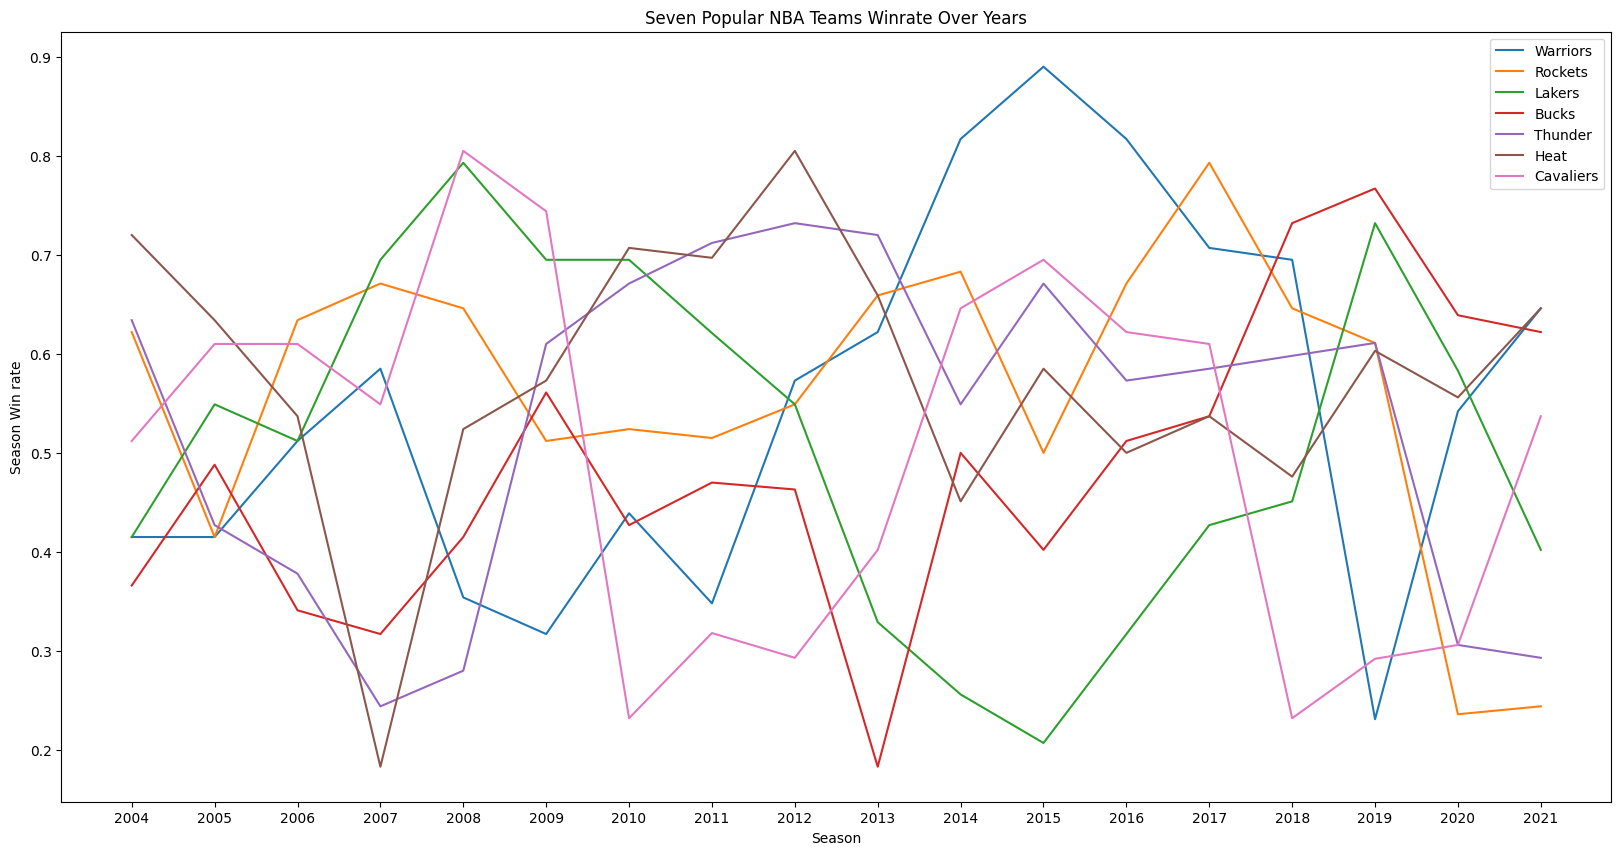

In [7]:
# Line Plot for Win Rate Over Year
x = [22004,22005,22006,22007,22008,22009,22010,22011,22012,22013,22014,22015,22016,22017,22018,22019,22020,22021]
x_str =['2004','2005','2006','2007','2008','2009','2010','2011','2012',"2013",'2014','2015','2016','2017','2018','2019','2020','2021']
team_list = ['Warriors','Rockets','Lakers','Bucks','Thunder','Heat','Cavaliers']
team_id_list = [1610612744,1610612745,1610612747,1610612749,1610612760,1610612748,1610612739]
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
y6 = []
y7 = []
for i in x:
    y1.append(find_winrate(rank,team_id_list[0],i))
    y2.append(find_winrate(rank,team_id_list[1],i))
    y3.append(find_winrate(rank,team_id_list[2],i))
    y4.append(find_winrate(rank,team_id_list[3],i))
    y5.append(find_winrate(rank,team_id_list[4],i))
    y6.append(find_winrate(rank,team_id_list[5],i))
    y7.append(find_winrate(rank,team_id_list[6],i))
    
plt.figure(figsize=(20, 10)) 
plt.plot(x_str,y1,label = 'Warriors')
plt.plot(x_str,y2,label = 'Rockets')
plt.plot(x_str,y3,label = 'Lakers')
plt.plot(x_str,y4,label = 'Bucks')
plt.plot(x_str,y5,label = 'Thunder')
plt.plot(x_str,y6,label = 'Heat')
plt.plot(x_str,y7,label = 'Cavaliers')
plt.xlabel("Season")
plt.ylabel('Season Win rate')
plt.title("Seven Popular NBA Teams Winrate Over Years")
plt.legend()

In [9]:
def Astar_list(year):
    #Find the list of All-Star players in specific year
    
    if year == 2017:
        return all_star_players_2017
    elif year == 2018:
        return all_star_players_2018
    elif year == 2019:
        return all_star_players_2019
    else:    
        result = list(all_star[all_star["Year"] == year]["Player"])
        return result

In [10]:
def is_imported(team_id, season):
    #Check whether a team imported a new All-Star Player into the team in a specific season
    
    season_last_game = games[(games['SEASON']==season)&((games["HOME_TEAM_ID"]==team_id) | (games["VISITOR_TEAM_ID"]==team_id))]['GAME_ID'].iloc[0]
    prev_season_last_game = games[(games['SEASON']==season-1)&((games["HOME_TEAM_ID"]==team_id) | (games["VISITOR_TEAM_ID"]==team_id))]['GAME_ID'].iloc[0]
    prev_all_star_list = Astar_list(season-1)
    player_list = list(details[(details['GAME_ID']==season_last_game)&(details['TEAM_ID']==team_id)]['PLAYER_NAME'])
    prev_player_list = list(details[(details['GAME_ID']==prev_season_last_game)&(details['TEAM_ID']==team_id)]["PLAYER_NAME"])
    found = 0
    for i in prev_all_star_list:
        if (i.lower() in list(map(str.lower,player_list)))&(i not in list(map(str.lower,prev_player_list))):
            found += 1
        else:
            continue
    
    if found > 1:
        return True
    else:
        return False

In [11]:
###Method to generate dataset we want

###2013-2020 games
###2000-2016 all star
### We choose 2014-2020 games
### We choose 2013-2019 all stars

team_id_list = list(rank[rank['SEASON_ID'] == 22015].groupby('TEAM_ID').agg("count").index)
season_list = [2014,2015,2016,2017,2018,2019,2020]
imported_list = []
for season in season_list:
    for team in team_id_list:
        imported_list.append(is_imported(team, season))

winrate_14_20 = []
winrate_13_19 = []
season_id_list = [22014,22015,22016,22017,22018,22019,22020]
season_id_list_2 = [22013,22014,22015,22016,22017,22018,22019]
for season_id in season_id_list:
    for team in team_id_list:
        winrate_14_20.append(find_winrate(rank,team, season_id))
        
for season_id in season_id_list_2:
    for team in team_id_list:
        winrate_13_19.append(find_winrate(rank,team, season_id))

In [12]:
season = [2014]*30 + [2015]*30 + [2016]*30 + [2017]*30 + [2018]*30 + [2019]*30 + [2020]*30
d = {"TEAM_ID":team_id_list*7, "SEASON":season, "treat":imported_list, "CURR_WINRATE":winrate_14_20, "PREV_WINRATE":winrate_13_19}
import_dataset = pd.DataFrame(data = d)
import_dataset

,TEAM_ID,SEASON,treat,CURR_WINRATE,PREV_WINRATE
0,1610612737,2014,False,0.732,0.463
1,1610612738,2014,False,0.488,0.305
2,1610612739,2014,True,0.646,0.402
3,1610612740,2014,False,0.549,0.415
4,1610612741,2014,False,0.610,0.585
...,...,...,...,...,...
205,1610612762,2020,False,0.722,0.611
206,1610612763,2020,False,0.528,0.466
207,1610612764,2020,True,0.472,0.347
208,1610612765,2020,False,0.278,0.303


In [13]:
team_dict = pd.Series(teams.TEAM_ID.values,index=teams.NICKNAME).to_dict()
team_names = []
for i in list(import_dataset['TEAM_ID']):
    team_names.append(list(team_dict.keys())[list(team_dict.values()).index(i)])
    
import_dataset['TEAM_NAME'] = team_names

Increase = []
for i in range(len(import_dataset)):
    Increase.append(round(import_dataset['CURR_WINRATE'].iloc[i] - import_dataset['PREV_WINRATE'].iloc[i],3))
    
import_dataset["DIFFERENCE"] = Increase
import_dataset["treat"] = import_dataset["treat"].astype(int)

In [14]:
def count_total_allstar(team_id, season):
    season_last_game = games[(games['SEASON']==season)&((games["HOME_TEAM_ID"]==team_id) | (games["VISITOR_TEAM_ID"]==team_id))]['GAME_ID'].iloc[-1]
    player_list = list(details[(details['GAME_ID']==season_last_game)&(details['TEAM_ID']==team_id)]['PLAYER_NAME'])
    total = 0
    for i in player_list:
        if i.lower() in list(map(str.lower,Astar_list(season))):
            total += 1
        else:
            continue
            
    return total

In [15]:
import_dataset['total_allstar'] = import_dataset.apply( lambda x: count_total_allstar(x.TEAM_ID, x.SEASON), axis = 1 )
conference_list = []
for i in list(import_dataset['TEAM_ID']):
    conference_list.append(list(rank[rank['TEAM_ID'] == i]["CONFERENCE"])[0])
    
import_dataset['CONFERENCE'] = conference_list
import_dataset

,TEAM_ID,SEASON,treat,CURR_WINRATE,PREV_WINRATE,TEAM_NAME,DIFFERENCE,total_allstar,CONFERENCE
0,1610612737,2014,0,0.732,0.463,Hawks,0.269,4,East
1,1610612738,2014,0,0.488,0.305,Celtics,0.183,0,East
2,1610612739,2014,1,0.646,0.402,Cavaliers,0.244,2,East
3,1610612740,2014,0,0.549,0.415,Pelicans,0.134,1,West
4,1610612741,2014,0,0.610,0.585,Bulls,0.025,2,East
...,...,...,...,...,...,...,...,...,...
205,1610612762,2020,0,0.722,0.611,Jazz,0.111,0,West
206,1610612763,2020,0,0.528,0.466,Grizzlies,0.062,0,West
207,1610612764,2020,1,0.472,0.347,Wizards,0.125,0,East
208,1610612765,2020,0,0.278,0.303,Pistons,-0.025,0,East


In [16]:
onehot = pd.get_dummies(list(import_dataset['CONFERENCE']))
df = import_dataset.join(onehot)
df

,TEAM_ID,SEASON,treat,CURR_WINRATE,PREV_WINRATE,TEAM_NAME,DIFFERENCE,total_allstar,CONFERENCE,East,West
0,1610612737,2014,0,0.732,0.463,Hawks,0.269,4,East,1,0
1,1610612738,2014,0,0.488,0.305,Celtics,0.183,0,East,1,0
2,1610612739,2014,1,0.646,0.402,Cavaliers,0.244,2,East,1,0
3,1610612740,2014,0,0.549,0.415,Pelicans,0.134,1,West,0,1
4,1610612741,2014,0,0.610,0.585,Bulls,0.025,2,East,1,0
...,...,...,...,...,...,...,...,...,...,...,...
205,1610612762,2020,0,0.722,0.611,Jazz,0.111,0,West,0,1
206,1610612763,2020,0,0.528,0.466,Grizzlies,0.062,0,West,0,1
207,1610612764,2020,1,0.472,0.347,Wizards,0.125,0,East,1,0
208,1610612765,2020,0,0.278,0.303,Pistons,-0.025,0,East,1,0


In [17]:
#Compute the Simple Difference in Observed group means (SDO) for this observational data.

sdo = sum(df[df['treat'] == 1]['DIFFERENCE']) / len(df[df['treat'] == 1]) - sum(df[df['treat'] == 0]['DIFFERENCE'])/ len(df[df['treat'] == 0])
sdo

0.01586229946524064

In [18]:
### Outcome Regression
def fit_OLS_model(df, target_variable, explanatory_variables, intercept = False):
    """
    Fits an OLS model from data.
    
    Inputs:
        df: pandas DataFrame
        target_variable: string, name of the target variable
        explanatory_variables: list of strings, names of the explanatory variables
        intercept: bool, if True add intercept term
    Outputs:
        fitted_model: model containing OLS regression results
    """
    
    target = df[target_variable]
    inputs = df[explanatory_variables]
    if intercept:
        inputs = sm.add_constant(inputs)
    
    fitted_model = sm.OLS(target, inputs).fit()
    return(fitted_model)

def mean_squared_error(true_vals, predicted_vals):
    """
    Return the mean squared error
    
    Inputs:
        true_vals: array of true labels
        predicted_vals: array labels predicted from the data
    Output:
        float, mean squared error of the predicted values
    """
    return np.mean((true_vals - predicted_vals) ** 2)

In [19]:
### one confounding
linear_model = fit_OLS_model(df, 'DIFFERENCE', ['treat','total_allstar'])
print(linear_model.summary())

                                 OLS Regression Results                                
Dep. Variable:             DIFFERENCE   R-squared (uncentered):                   0.005
Model:                            OLS   Adj. R-squared (uncentered):             -0.004
Method:                 Least Squares   F-statistic:                             0.5635
Date:                Sun, 10 Dec 2023   Prob (F-statistic):                       0.570
Time:                        23:37:04   Log-Likelihood:                          125.80
No. Observations:                 210   AIC:                                     -247.6
Df Residuals:                     208   BIC:                                     -240.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [20]:
### all confounders
linear_model = fit_OLS_model(df, 'DIFFERENCE', ['treat','PREV_WINRATE','total_allstar','East','West'])
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:             DIFFERENCE   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     19.33
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           1.64e-13
Time:                        23:37:13   Log-Likelihood:                 158.85
No. Observations:                 210   AIC:                            -307.7
Df Residuals:                     205   BIC:                            -291.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
treat             0.0594      0.024      2.486

In [21]:
#Frequentist
def draw_tau_hat(data=df, random_state=None):
    """Returns a single bootstrapped estimate of the ATE.
    
    Inputs:
        data: DataFrame of observed data
        random_state: integer to help standardize sampling output 
        for grading and troubleshooting purposes
    Output:
        float, estimated average treatment effect
    """
    sample = data.sample(n=len(data), replace=True, random_state=random_state)
    fit_model = fit_OLS_model(sample, 'DIFFERENCE', ['treat','PREV_WINRATE','total_allstar','East','West'])
    estimated_ate = fit_model.params['treat']
    return estimated_ate

def get_bootstrapped_ate(data=df, n=1000):
    """Returns n bootstrapped estimates of the ATE.
    
    Inputs:
        data: DataFrame of observed data
        n: number of bootstrapped estimates we would like to return
    Output:
        list of estimated average treatment effects
    """
    estimates = []
    for i in np.arange(n):
        estimate = draw_tau_hat(data)
        estimates.append(estimate)
    return estimates

In [22]:
ates = get_bootstrapped_ate(df, 2000)
confidence_interval = [np.percentile(ates, 2.5), 
                       np.percentile(ates, 97.5)]
print(f"Our 95% confidence interval ranges from {(confidence_interval[0])} to {(confidence_interval[1])}")

Our 95% confidence interval ranges from 0.014902047071972999 to 0.10760397815332128


Text(0.5, 1.0, 'Bootstrapped Estimates of the ATE')

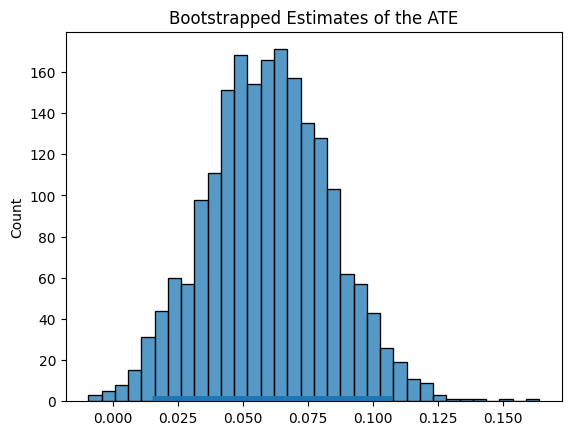

In [23]:
sns.histplot(ates)
plt.hlines(1, confidence_interval[0], confidence_interval[1], linewidth=5)
plt.title("Bootstrapped Estimates of the ATE")